In [1]:
import mediapipe as mp # Import mediapipe
import cv2 # Import opencv
import time
import csv
import os
import numpy as np

In [2]:
mp_drawing = mp.solutions.drawing_utils # Drawing helpers
mp_holistic = mp.solutions.holistic # Mediapipe Solutions
# mp_hands = mp.solutions.hands

# Test Detection & Make Landmark

In [4]:
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)

# Initiate holistic model
prevTime = 0
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        ###
        initialTime = time.time()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        ### First point
        firstTime = time.time() - initialTime
        cv2.putText(image, f'1: {round(firstTime,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        ### Seocnd point
        secondTime = time.time() - initialTime
        cv2.putText(image, f'2: {round(secondTime,3)}', (20,150), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,40), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [3]:
# num_pose_coords = len(results.pose_landmarks.landmark)
# num_pose_coords

In [3]:
num_pose_coords = 22
num_pose_coords

22

In [4]:
# "LEFT" hand coords
# num_left_hand_coords = len(results.right_hand_landmarks.landmark)
num_left_hand_coords = 20
num_left_hand_coords

20

In [5]:
# "RIGHT" hand coords
# num_right_hand_coords = len(results.left_hand_landmarks.landmark)
num_right_hand_coords = 20
num_right_hand_coords

20

In [6]:
num_hand_coords = num_right_hand_coords + num_left_hand_coords
num_hand_coords

40

In [7]:
num_pose_hand_coords = num_pose_coords + num_right_hand_coords + num_left_hand_coords
num_pose_hand_coords

62

In [8]:
# num_face_coords = len(results.face_landmarks.landmark)
num_face_coords = 467
num_face_coords

467

In [10]:
# pose_hand_landmarks = ['class']
# for val in range(1, num_pose_hand_coords+1):
#     pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [11]:
face_landmarks = ['class']
for val in range(1, num_face_coords+1):
    face_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

In [12]:
# pose_landmarks = ['class']
# for val in range(1, num_pose_coords+1):
#     pose_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)]

In [13]:
# hand_landmarks = ['class']
# for val in range(1, num_hand_coords+1):
#     hand_landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [14]:
pose_hand_landmarks = ['class']
for val in range(1, num_pose_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]
for val in range(num_pose_coords+1, num_pose_coords+num_hand_coords+1):
    pose_hand_landmarks += ['x{}'.format(val), 'y{}'.format(val)]

# Set the Directory Path

In [9]:
path_rawData = ".//rawData"
path_model = ".//model"

# Pose & Hand Recording

In [16]:
# with open('sample.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(pose_hand_landmarks)

In [15]:
pose_hand_file = '//210924pose_hand_sample.csv'
with open(path_rawData + pose_hand_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(pose_hand_landmarks)

In [42]:
class_name = "11"

In [44]:
### Revise one
### Remove unnecessary value & Hand Coordinate Move

start = False
waiting = False
checker = False
waiting_time = time.time()
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                                          for i in range(1, num_pose_coords+1)]).flatten())
                try:
                    # Extract "RIGHT" Hand lanmarks
                    righthand = results.left_hand_landmarks.landmark
                    righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                                                   for i in range(1,num_right_hand_coords+1)]).flatten())
                except:
                    righthand_row = [0 for i in range(num_right_hand_coords*2)]

                try:
                    # Extract "LEFT" Hand lanmarks
                    lefthand = results.right_hand_landmarks.landmark
                    lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
                except:
                    lefthand_row = [0 for i in range(num_left_hand_coords*2)]
                        
                
                # Concate rows
                row = pose_row + righthand_row + lefthand_row

                # Append class name 
                row.insert(0, class_name)
            

                # Export to CSV
                with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)
            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Wait 3 seconds")
            waiting_time = time.time() + (3)
            checker = True
            
        if time.time() > waiting_time and checker == True:
            waiting = True
            checker = False
                
        if waiting:
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
            waiting = False
        
        # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Wait 3 seconds
Recording Start!


In [ ]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten()) 
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
                        
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row

#                 # Append class name 
#                 row.insert(0, class_name)
            

#                 # Export to CSV
#                 with open(path_rawData + pose_hand_file, mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

In [36]:
# ### 손 하나가 안보이면 예외처리가 되는 에러

# start = False
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
# #         # 1. Draw face landmarks
# #         mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
# #                                  mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
# #                                  mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
# #                                  )
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

#         # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )
        
#         if start:
#             # Export coordinates
#             try:
#                 # Extract Pose landmarks
#                 pose = results.pose_landmarks.landmark
#                 pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())

# #                 # Extract Face landmarks
# #                 face = results.face_landmarks.landmark
# #                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
                
#                 # Extract "RIGHT" Hand lanmarks
#                 righthand = results.left_hand_landmarks.landmark
#                 righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in righthand]).flatten())
                
#                 # Extract "LEFT" Hand lanmarks
#                 lefthand = results.right_hand_landmarks.landmark
#                 lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in lefthand]).flatten())
                
#                 # Concate rows
#                 row = pose_row + righthand_row + lefthand_row
 
#                 # Append class name 
#                 row.insert(0, class_name)
                
#                 # Export to CSV
#                 with open('pose_hand_sample.csv', mode='a', newline='') as f:
#                     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                     csv_writer.writerow(row)

#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Recording Start!")
#             max_time_end = time.time() + (5)
#             start = True
        
#         # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

Recording Start!


# Hand Recording

In [73]:
# hand_file = '//210910hand_sample.csv'
# with open(path_rawData+fileName, mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(hand_landmarks)

In [74]:
# class_name = "0"

In [26]:
# ### Revise one

# start = False
# waiting = False
# checker = False
# right = True
# left = True

# waiting_time = time.time()
# max_time_end = time.time()
# cap = cv2.VideoCapture(0)
# cap.set(3, 1280)
# cap.set(4, 720)
# # Initiate holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         # Recolor Feed
#         image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#         image = cv2.flip(image, 1)
#         image.flags.writeable = False
        
#         # Make Detections
#         results = holistic.process(image)
#         # print(results.face_landmarks)
        
#         # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
#         # Recolor image back to BGR for rendering
#         image.flags.writeable = True   
#         image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        
#         # 2. Right hand
#         mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                                  )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )
        
# #         righthand = results.left_hand_landmarks.landmark
# #         for landmark in righthand:
# #             print(landmark)
        
#         if start:
#             # Export coordinates
#             try:
                
#                 try:
#                     # Extract "RIGHT" Hand lanmarks
#                     righthand = results.left_hand_landmarks.landmark
#                     righthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in righthand]).flatten())
#                     right = True
#                 except:
#                     righthand_row = [0 for i in range(num_right_hand_coords*3)]
#                     right = False

#                 try:
#                     # Extract "LEFT" Hand lanmarks
#                     lefthand = results.right_hand_landmarks.landmark
#                     lefthand_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in lefthand]).flatten())
#                     left = True
#                 except:
#                     lefthand_row = [0 for i in range(num_left_hand_coords*3)]
#                     left = False
                
#                 if right != False or left != False:
#                     # Concate rows
#                     row = righthand_row + lefthand_row

#                     # Append class name 
#                     row.insert(0, class_name)


#                     # Export to CSV
#                     with open(path_rawData + hand_file, mode='a', newline='') as f:
#                         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#                         csv_writer.writerow(row)
                        
#             except:
#                 pass
                        
#         cv2.imshow('Gather Pose Data', image)
        
#         # r키를 눌러서 녹화 시작 - 20초간 녹화
#         if cv2.waitKey(10) & 0xFF == ord('r'):
#             print("Wait 3 seconds")
#             waiting_time = time.time() + (3)
#             checker = True
            
#         if time.time() > waiting_time and checker == True:
#             waiting = True
#             checker = False
                
#         if waiting:
#             print("Recording Start!")
#             max_time_end = time.time() + (10)
#             start = True
#             waiting = False
        
#         # r키를 눌러서 녹화 시작 후 30초 후에 녹화 종료
#         if time.time() > max_time_end and start == True:
#             start = False
#             break
        
#         # q키를 눌러서 강제로 녹화 종료 가능
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             start = False
#             break

# cap.release()
# cv2.destroyAllWindows()

# Face Recording

In [45]:
face_file = '//210924face_sample.csv'
with open(path_rawData + face_file, mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(face_landmarks)

In [50]:
class_name = "2"

In [51]:
start = False
max_time_end = time.time()
# cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        if start:
            # Export coordinates
            try:
                # Extract Face landmarks
                face = results.face_landmarks.landmark
#                 face_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in face]).flatten())            
                face_row = list(np.array([[face[i].x-face[0].x, face[i].y-face[0].y] 
                                          for i in range(1, num_face_coords+1)]).flatten())
                # Concate rows
                row = face_row

                # Append class name 
                row.insert(0, class_name)

                # Export to CSV
                with open(path_rawData + face_file, mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

            except:
                pass
                        
        cv2.imshow('Gather Pose Data', image)
        
        # r키를 눌러서 녹화 시작 - 20초간 녹화
        if cv2.waitKey(10) & 0xFF == ord('r'):
            print("Recording Start!")
            max_time_end = time.time() + (60)
            start = True
        
        # r키를 눌러서 녹화 시작 후 15초 후에 녹화 종료
        if time.time() > max_time_end and start == True:
            start = False
            break
        
        # q키를 눌러서 강제로 녹화 종료 가능
        if cv2.waitKey(10) & 0xFF == ord('q'):
            start = False
            break

cap.release()
cv2.destroyAllWindows()

Recording Start!


# Train Custom Model Using Scikit Learn

In [10]:
# Read in Collected Data and Process
import pandas as pd
from sklearn.model_selection import train_test_split

# Train Machine Learning Classification Model
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluate and Serialize Model
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle 

### Read in Collected Data and Process

In [18]:
pose_hand_df = pd.read_csv(path_rawData + '//210924pose_hand_sample.csv')
face_df = pd.read_csv(path_rawData + '//210924face_sample.csv')

In [19]:
# Remove NaN Value
pose_hand_df = pose_hand_df.dropna(axis=0)
face_df = face_df.dropna(axis=0)

In [20]:
pose_hand_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
0,0,0.019812,-0.063104,0.035576,-0.062442,0.050231,-0.060305,-0.021937,-0.061169,-0.035918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.019855,-0.063723,0.035594,-0.063116,0.050285,-0.060637,-0.021898,-0.061875,-0.035902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.019995,-0.064764,0.035725,-0.064167,0.050436,-0.061187,-0.021760,-0.063101,-0.035791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.019988,-0.064930,0.035659,-0.064442,0.050380,-0.061287,-0.021343,-0.063491,-0.035294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.019845,-0.064781,0.035402,-0.064376,0.050114,-0.061243,-0.020775,-0.063433,-0.034403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
pose_hand_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x58,y58,x59,y59,x60,y60,x61,y61,x62,y62
15268,11,0.018200,-0.061510,0.032502,-0.064011,0.044534,-0.065752,-0.020796,-0.053363,-0.033789,...,0.023555,-0.224254,0.065822,-0.038500,0.055940,-0.107973,0.040980,-0.147547,0.023755,-0.177257
15269,11,0.017785,-0.061528,0.032183,-0.064029,0.043164,-0.065744,-0.021500,-0.053580,-0.034603,...,0.043631,-0.203592,0.073613,-0.012335,0.079273,-0.068517,0.066413,-0.111684,0.047856,-0.146468
15270,11,0.017290,-0.062569,0.031580,-0.065391,0.042650,-0.066876,-0.021532,-0.052729,-0.034263,...,0.058924,-0.201230,0.072506,-0.019923,0.079837,-0.079139,0.069358,-0.121710,0.053101,-0.154170
15271,11,0.017616,-0.063097,0.031944,-0.065611,0.042450,-0.066895,-0.021539,-0.054013,-0.034651,...,0.035584,-0.253156,0.061763,-0.078552,0.060616,-0.149090,0.047382,-0.190148,0.029732,-0.220743
15272,11,0.017479,-0.063248,0.031826,-0.065902,0.042429,-0.067087,-0.021659,-0.053560,-0.034821,...,-0.017518,-0.200557,0.029183,-0.039451,0.008331,-0.094069,-0.009112,-0.123191,-0.022574,-0.152166


In [22]:
face_df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,0,-0.001114,-0.036185,-0.000124,-0.024166,-0.005943,-0.081120,-0.001083,-0.049960,-0.000607,...,0.021472,-0.114496,0.016949,-0.111385,0.014322,-0.109231,0.055287,-0.120328,0.059143,-0.124905
1,0,-0.001286,-0.037593,-0.000235,-0.025362,-0.006108,-0.082033,-0.001277,-0.051266,-0.000791,...,0.021443,-0.115045,0.016901,-0.111933,0.014256,-0.109778,0.055266,-0.120652,0.059097,-0.125219
2,0,-0.001255,-0.037593,-0.000215,-0.025283,-0.006189,-0.082004,-0.001279,-0.051293,-0.000848,...,0.021132,-0.115252,0.016624,-0.112070,0.014004,-0.109900,0.054844,-0.121038,0.058668,-0.125621
3,0,-0.001434,-0.037102,-0.000282,-0.024867,-0.006471,-0.081305,-0.001526,-0.050782,-0.001139,...,0.021008,-0.114822,0.016477,-0.111633,0.013808,-0.109455,0.054819,-0.120913,0.058719,-0.126054
4,0,-0.001354,-0.037601,-0.000232,-0.025190,-0.006522,-0.081453,-0.001460,-0.051246,-0.001118,...,0.020954,-0.114779,0.016430,-0.111579,0.013759,-0.109405,0.054718,-0.121107,0.058606,-0.126335


In [23]:
face_df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
2648,2,-0.002081,-0.047608,-0.001014,-0.032307,-0.007470,-0.090632,-0.002233,-0.061626,-0.002009,...,0.018958,-0.123100,0.014690,-0.119525,0.012170,-0.117374,0.052437,-0.130289,0.056172,-0.136281
2649,2,-0.001769,-0.047872,-0.000838,-0.032280,-0.007076,-0.090696,-0.001888,-0.061896,-0.001649,...,0.018943,-0.122022,0.014738,-0.118693,0.012269,-0.116730,0.052083,-0.128653,0.055839,-0.134578
2650,2,-0.001956,-0.047162,-0.000924,-0.032089,-0.007276,-0.090279,-0.002094,-0.061139,-0.001871,...,0.018824,-0.122625,0.014609,-0.119163,0.012136,-0.117059,0.052111,-0.129709,0.055851,-0.135643
2651,2,-0.001862,-0.047322,-0.000891,-0.032288,-0.007154,-0.090674,-0.001981,-0.061307,-0.001751,...,0.018709,-0.123053,0.014531,-0.119621,0.012099,-0.117526,0.051808,-0.129947,0.055517,-0.135750
2652,2,-0.001635,-0.047526,-0.000701,-0.032519,-0.006980,-0.090966,-0.001758,-0.061486,-0.001516,...,0.019012,-0.124512,0.014812,-0.120828,0.012380,-0.118562,0.052387,-0.132419,0.056108,-0.138297


In [82]:
pose_hand_X = pose_hand_df.drop('class', axis=1) # features
pose_hand_y = pose_hand_df['class'] # target value
face_X = face_df.drop('class', axis=1) # features
face_y = face_df['class'] # target value

In [25]:
pose_hand_X_train, pose_hand_X_test, pose_hand_y_train, pose_hand_y_test = train_test_split(pose_hand_X, pose_hand_y, stratify=pose_hand_y, test_size=0.25, random_state=1234)
face_X_train, face_X_test, face_y_train, face_y_test = train_test_split(face_X, face_y, stratify=face_y, test_size=0.25, random_state=1234)

In [26]:
pose_hand_y_train.value_counts()

9     1348
3     1348
1     1347
2     1347
11    1345
4      675
7      675
0      675
6      674
10     674
5      673
8      673
Name: class, dtype: int64

In [27]:
pose_hand_y_test.value_counts()

3     450
9     450
2     449
1     449
11    448
10    225
5     225
4     225
0     225
7     225
6     224
8     224
Name: class, dtype: int64

In [28]:
face_y_train.value_counts()

1    670
0    670
2    649
Name: class, dtype: int64

In [29]:
face_y_test.value_counts()

1    224
0    223
2    217
Name: class, dtype: int64

### Train Machine Learning Classificaiton Model for pose_hand

In [29]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [30]:
pose_hand_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(pose_hand_X_train, pose_hand_y_train)
    pose_hand_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
pose_hand_fit_models

NameError: name 'pose_hand_fit_models' is not defined

In [32]:
pose_hand_fit_models['sv'].predict(pose_hand_X_test)

array([ 3, 11, 10, ...,  4,  1,  9], dtype=int64)

In [33]:
# Test for pose_hand_fit_models
for algo, model in pose_hand_fit_models.items():
    pred = model.predict(pose_hand_X_test)
    print(algo, accuracy_score(pose_hand_y_test, pred))

lr 0.9994763026970411
rc 0.99528672427337
rf 1.0
gb 0.9984289080911233
sv 0.9997381513485205


In [34]:
# Export pose_hand_fit_models
modelName = '//210924pose_hand.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(pose_hand_fit_models['rf'], f)

### Train Machine Learning Classificaiton Model for face

In [ ]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [35]:
face_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(face_X_train, face_y_train)
    face_fit_models[algo] = model

C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [36]:
face_fit_models

{'lr': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression', LogisticRegression())]),
 'rc': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())]),
 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingclassifier', GradientBoostingClassifier())]),
 'sv': Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])}

In [37]:
# Test for face_fit_models
for algo, model in face_fit_models.items():
    pred = model.predict(face_X_test)
    print(algo, accuracy_score(face_y_test, pred))

lr 0.9849397590361446
rc 0.9819277108433735
rf 0.9789156626506024
gb 0.9804216867469879
sv 0.9804216867469879


In [38]:
# Export pose_hand_fit_models
modelName = '//210924face.pkl'
with open(path_model + modelName, 'wb') as f:
    pickle.dump(face_fit_models['lr'], f)

# Model Evaluation

In [102]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    'sv':make_pipeline(StandardScaler(), SVC()),
}

In [ ]:
pose_hand_fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(face_X_train, face_y_train)
    face_fit_models[algo] = model

In [ ]:
# Test for face_fit_models
for algo, model in face_fit_models.items():
    pred = model.predict(face_X_test)
    print(algo, accuracy_score(face_y_test, pred))

In [99]:
kfold = StratifiedKFold(n_splits=5).split(pose_hand_X, pose_hand_y)
for k, (train, test) in enumerate(kfold):
    X_train=pose_hand_X.iloc[train]
    y_train=pose_hand_y.iloc[train]
    X_test=pose_hand_X.iloc[test]
    y_test=pose_hand_y.iloc[test]
    print(len(train))
    print(len(test))

12218
3055
12218
3055
12218
3055
12219
3054
12219
3054


In [104]:
# cross-vadlidation for pose_hand_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(pose_hand_X, pose_hand_y)

scores = []
for algo, pipeline in pipelines.items():
    print(pipeline)
    for k, (train, test) in enumerate(kfold):
        pipeline.fit(pose_hand_X.iloc[train], pose_hand_y.iloc[train])
        score = pipeline.score(pose_hand_X.iloc[test], pose_hand_y.iloc[test])
        scores.append(score)
        print('Fold: %2d, Class Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(pose_hand_y.iloc[train]), score))
    print('\nCV Accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  1, 클래스 분포: [ 810 1616 1616 1619  810  808  808  810  807 1618  810 1613], 정확도: 1.000


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  2, 클래스 분포: [ 810 1616 1616 1619  810  808  808  810  807 1619  809 1613], 정확도: 0.998


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  3, 클래스 분포: [ 810 1616 1617 1618  810  808  808  810  807 1619  809 1613], 정확도: 0.990


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  4, 클래스 분포: [ 810 1616 1617 1618  810  808  808  810  808 1618  809 1614], 정확도: 0.997


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  5, 클래스 분포: [ 810 1616 1617 1618  810  808  808  810  808 1618  809 1614], 정확도: 0.997


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  6, 클래스 분포: [ 810 1616 1617 1618  810  808  808  810  808 1618  809 1614], 정확도: 0.983


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  7, 클래스 분포: [ 810 1617 1616 1618  810  808  809  810  807 1618  809 1614], 정확도: 0.998


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  8, 클래스 분포: [ 810 1617 1616 1618  810  808  809  810  807 1618  809 1614], 정확도: 0.990


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


폴드:  9, 클래스 분포: [ 810 1617 1616 1618  810  809  808  810  807 1618  809 1614], 정확도: 0.990
폴드: 10, 클래스 분포: [ 810 1617 1616 1618  810  809  808  810  807 1618  809 1614], 정확도: 1.000

CV 정확도: 0.994 +/- 0.005
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier', RidgeClassifier())])

CV 정확도: 0.994 +/- 0.005
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

CV 정확도: 0.994 +/- 0.005
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

CV 정확도: 0.994 +/- 0.005
Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

CV 정확도: 0.994 +/- 0.005


C:\Users\LeeSooHwan\anaconda3\envs\zoom\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [ ]:
from sklearn.metrics import confusion_matrix


# Test DEMO

In [ ]:
#######################
### Make Code Clear ###
#######################

mp_holistic = mp.solutions.holistic  # Mediapipe Solutions

pose_hand_model = "//210924pose_hand.pkl"
face_model = "//210924face.pkl"

# Load Model
with open(path_model + pose_hand_model, 'rb') as f:
    pose_hand_model = pickle.load(f)
with open(path_model + face_model, 'rb') as f:
    face_model = pickle.load(f)


cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture(1)
cap.set(3, 1280)
cap.set(4, 720)
prevTime = 0
readData = True

# def sample(x,y):
#     return x,y

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Start point: Timer for make dataframe
        if readData:
            beginTime = time.time()
            readData = False
        
        ### Start point: Timer for Debugging
        initialTime = time.time()

        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = cv2.flip(image, 1)
        image.flags.writeable = False        
        
        # Make Detectionsq
        results = holistic.process(image)
                
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # --------------------------------------------------------------------------------------------- #
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # --------------------------------------------------------------------------------------------- #
        
        
        # Export Pose-Hand coordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[pose[i].x-pose[0].x, pose[i].y-pose[0].y] 
                          for i in range(1, num_pose_coords+1)]).flatten())
            # Extract "RIGHT" Hand lanmarks
            try:
                righthand = results.left_hand_landmarks.landmark
                righthand_row = list(np.array([[righthand[i].x - righthand[0].x, righthand[i].y - righthand[0].y]
                               for i in range(1,num_right_hand_coords+1)]).flatten())
            except:
                righthand_row = [0 for i in range(num_right_hand_coords*2)]

            # Extract "LEFT" Hand lanmarks
            try:
                lefthand = results.right_hand_landmarks.landmark
                lefthand_row = list(np.array([[lefthand[i].x - lefthand[0].x, lefthand[i].y - lefthand[0].y]
                                                  for i in range(1,num_left_hand_coords+1)]).flatten())
            except:
                lefthand_row = [0 for i in range(num_left_hand_coords*2)]
            
            # Concate rows
            pose_hand_row = pose_row+righthand_row+lefthand_row
            
            # Make Prediction
            pose_hand_class = pose_hand_model.predict([pose_hand_row])[0]
            pose_hand_prob = pose_hand_model.predict_proba([pose_hand_row])[0]
                     
            # Get status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(pose_hand_class)
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(pose_hand_prob[np.argmax(pose_hand_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
            
        # Export Face coordinates
        try:
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[face[i].x - face[0].x, face[i].y - face[0].y]
                                                  for i in range(1,num_face_coords+1)]).flatten())
            
            
            # Make Prediction
            face_class = face_model.predict([face_row])[0]
            face_prob = face_model.predict_proba([face_row])[0]
            
            
            # Get status box
            cv2.rectangle(image, (250,0), (500, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (345,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, face_class.split(' ')[0]
                        , (340,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display Probability
            cv2.putText(image, 'PROB'
                        , (265,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(face_prob[np.argmax(face_prob)],2))
                        , (260,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
        
        # Calculate FPS
        currTime = time.time()
        fps = 1 / (currTime - prevTime)
        prevTime = currTime
        cv2.putText(image, f'FPS: {round(fps,3)}', (20,100), cv2.FONT_HERSHEY_PLAIN, 2, (0,0,255), 1)
        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# Virtual Cam DEMO

In [202]:
# Load Pose_Hand_Images with Array Test
from PIL import Image
import os, os.path

pose_hand_imgs = []
path = "./effect/sample/"
fileType = '.png'
fileList = os.listdir(path)
fileList.sort()
print(fileList)
for i in range(0,20):
    imgs.append(Image.open(path+str(i)+fileType))

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: './effect/sample/'

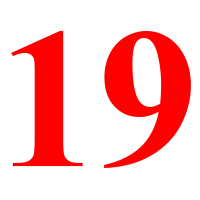

In [330]:
imgs[19]

In [ ]:
# VirtualCam DEMO